In [1]:
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
%matplotlib inline 

from P300 import *


In [2]:
np.ones(64)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [3]:
np.savetxt("ones.txt", np.ones(64), fmt="%d")

## Combine channel masks

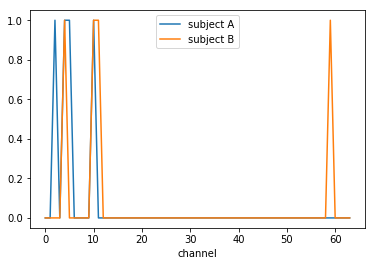

In [4]:
#num_chosen_channels=2
num_chosen_channels=4
mask_A = load_channel_mask('A',num_chosen_channels)
mask_B = load_channel_mask('B',num_chosen_channels)

plt.plot(mask_A)
plt.plot(mask_B)
plt.xlabel('channel')
plt.legend(('subject A','subject B'))
#print(mask)

## play with the training results

In [5]:
# load data and model

subject = 'A'
#subject = 'B'
num_epoches = 85

X_train, Y_train, C_train = load_data(subject, 'train', num_epoches)





loaded:
(85, 180, 896)
(85, 180, 1)
(85, 180, 1)
stacked:
(15300, 896)
(15300,)
(15300,)


In [6]:
num_chosen_channels=32
mask = load_channel_mask(subject,num_chosen_channels)
#plt.plot(mask)
print(mask)

[0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0]


In [7]:
X_train_chosen=apply_mask(X_train, mask)
X_train_chosen.shape

(15300, 448)

In [8]:
from sklearn.externals import joblib

# load trained model



#clf = joblib.load('A_model_SVM_ch32.model') 
clf = joblib.load('2018.11.11_cross_validation_balanced_scaling/A_model_SVM_ch32.model') 

print(clf)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100000.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])


In [9]:
clf.named_steps['linear_svc'].coef_

AttributeError: 'LinearSVC' object has no attribute 'coef_'

In [11]:
#clf.predict_log_proba(X_train_chosen)
Yhat = clf.predict(X_train_chosen)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.